In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [6]:
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length and width
y = (iris.target == 0).astype(np.int) # Iris setosa ?

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [7]:
y_pred

array([1])

In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
tf.__version__

'2.4.1'

In [10]:
keras.__version__

'2.4.0'

In [11]:
fashion_mnist = keras.datasets.fashion_mnist

In [12]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [13]:
X_train_full.shape

(60000, 28, 28)

In [15]:
X_train_full.dtype

dtype('uint8')

In [16]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [18]:
class_names[y_train[0]]

'Coat'

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.layers

In [22]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [23]:
model.get_layer(hidden1.name) is hidden1

True

In [24]:
weights, biases = hidden1.get_weights()

In [25]:
weights

array([[ 0.038603  , -0.06862283, -0.02021981, ..., -0.00496241,
         0.0471869 ,  0.00747262],
       [ 0.03541609,  0.05139717,  0.0527024 , ...,  0.06281766,
         0.01354369, -0.04437777],
       [-0.00683432,  0.05364791,  0.05007171, ...,  0.00253814,
         0.02830452,  0.01227477],
       ...,
       [ 0.06826375, -0.05682009, -0.05628312, ...,  0.04679225,
        -0.04729334,  0.00932236],
       [ 0.04878592, -0.01593674, -0.01767081, ...,  0.07023495,
        -0.04674324, -0.01461582],
       [ 0.02358428, -0.01489579, -0.04791579, ..., -0.03064432,
         0.06459033,  0.04289089]], dtype=float32)

In [26]:
weights.shape

(784, 300)

In [27]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [28]:
biases.shape

(300,)

In [29]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [31]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 1.0163 - accuracy: 0.6793 - val_loss: 0.5056 - val_accuracy: 0.8312
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4937 - accuracy: 0.8302 - val_loss: 0.4365 - val_accuracy: 0.8520
Epoch 3/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4451 - accuracy: 0.8445 - val_loss: 0.4159 - val_accuracy: 0.8520
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4128 - accuracy: 0.8558 - val_loss: 0.4241 - val_accuracy: 0.8484
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4001 - accuracy: 0.8589 - val_loss: 0.3816 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3840 - accuracy: 0.8647 - val_loss: 0.3718 - val_accuracy: 0.8724
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3665 - accuracy: 0.8714 - val_loss: 0.3681 - val_accuracy:

In [32]:
import pandas as pd

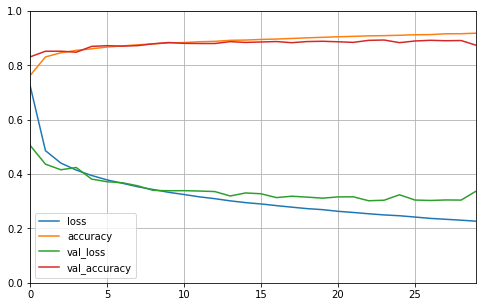

In [33]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [35]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 51.3127 - accuracy: 0.8637


[51.31266403198242, 0.8636999726295471]

In [39]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [40]:
y_pred = np.argmax(model.predict(X_new), axis=1)
y_pred

array([9, 2, 1], dtype=int64)

In [41]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [42]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [57]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [58]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [60]:
np.random.seed(42)
tf.random.set_seed(42)

In [61]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 935us/step - loss: 2.2656 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 726us/step - loss: 0.7413 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 701us/step - loss: 0.6604 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 700us/step - loss: 0.6245 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 772us/step - loss: 0.5770 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 697us/step - loss: 0.5609 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 744us/step - loss: 0.5500 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 726us/step - loss: 0.5200 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 831us/step - loss: 0.5051 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 787us/step - loss: 0.491

In [62]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

162/162 [==============================] - 0s 530us/step - loss: 0.4212


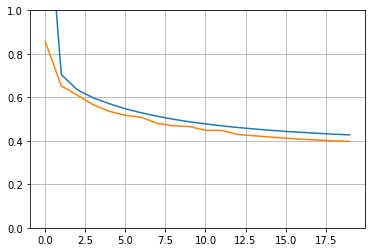

In [63]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [64]:
y_pred

array([[0.3885664],
       [1.6792021],
       [3.1022797]], dtype=float32)

In [67]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [68]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 30)           270         input_3[0][0]                    
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           930         dense_10[0][0]                   
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 38)           0           input_3[0][0]                    
                                                                 dense_11[0][0]               

In [69]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 3.1131 - val_loss: 2.7131
Epoch 2/20
363/363 [==============================] - 0s 836us/step - loss: 0.7982 - val_loss: 0.6461
Epoch 3/20
363/363 [==============================] - 0s 842us/step - loss: 0.6542 - val_loss: 0.6101
Epoch 4/20
363/363 [==============================] - 0s 829us/step - loss: 0.6220 - val_loss: 0.5695
Epoch 5/20
363/363 [==============================] - 0s 831us/step - loss: 0.5689 - val_loss: 0.5415
Epoch 6/20
363/363 [==============================] - 0s 770us/step - loss: 0.5455 - val_loss: 0.5239
Epoch 7/20
363/363 [==============================] - 0s 849us/step - loss: 0.5395 - val_loss: 0.5123
Epoch 8/20
363/363 [==============================] - 0s 772us/step - loss: 0.5139 - val_loss: 0.4832
Epoch 9/20
363/363 [==============================] - 0s 821us/step - loss: 0.4963 - val_loss: 0.4673
Epoch 10/20
363/363 [==============================] - 0s 791us/step - loss: 0.4853 

In [70]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

162/162 [==============================] - 0s 460us/step - loss: 0.4023


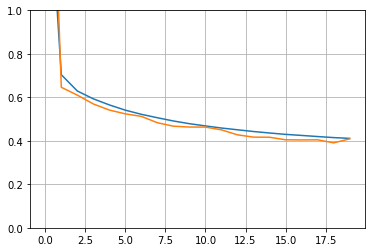

In [71]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [72]:
y_pred

array([[0.49783468],
       [1.7598438 ],
       [3.4431183 ]], dtype=float32)

In [73]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [74]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 30)           930         dense_13[0][0]                   
____________________________________________________________________________________________

In [75]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_new[:, :5], X_new[:, 2:]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)
X_new = X_test[:3]
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 3.5735 - val_loss: 1.2747
Epoch 2/20
363/363 [==============================] - 0s 873us/step - loss: 0.8716 - val_loss: 0.6923
Epoch 3/20
363/363 [==============================] - 0s 894us/step - loss: 0.6648 - val_loss: 0.5778
Epoch 4/20
363/363 [==============================] - 0s 872us/step - loss: 0.5935 - val_loss: 0.5309
Epoch 5/20
363/363 [==============================] - 0s 873us/step - loss: 0.5399 - val_loss: 0.4960
Epoch 6/20
363/363 [==============================] - 0s 831us/step - loss: 0.5005 - val_loss: 0.4766
Epoch 7/20
363/363 [==============================] - 0s 874us/step - loss: 0.4969 - val_loss: 0.4662
Epoch 8/20
363/363 [==============================] - 0s 848us/step - loss: 0.4775 - val_loss: 0.4432
Epoch 9/20
363/363 [==============================] - 0s 830us/step - loss: 0.4577 - val_loss: 0.4586
Epoch 10/20
363/363 [==============================] - 0s 874us/step - loss: 0.4502 

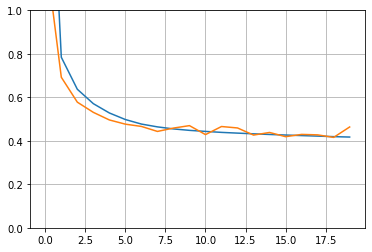

In [76]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [77]:
y_pred

array([[0.40994203],
       [1.8999227 ],
       [3.312199  ]], dtype=float32)

In [79]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2) # auxliary output
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [80]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer='sgd')

In [82]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.4917 - main_output_loss: 1.3280 - aux_output_loss: 2.9643 - val_loss: 0.9666 - val_main_output_loss: 0.9289 - val_aux_output_loss: 1.3053
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5817 - main_output_loss: 0.5098 - aux_output_loss: 1.2293 - val_loss: 4.6824 - val_main_output_loss: 5.0737 - val_aux_output_loss: 1.1609
Epoch 3/20
363/363 [==============================] - 0s 959us/step - loss: 0.5941 - main_output_loss: 0.5454 - aux_output_loss: 1.0328 - val_loss: 1.2940 - val_main_output_loss: 1.3306 - val_aux_output_loss: 0.9651
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4923 - main_output_loss: 0.4451 - aux_output_loss: 0.9168 - val_loss: 1.3763 - val_main_output_loss: 1.4234 - val_aux_output_loss: 0.9518
Epoch 5/20
363/363 [==============================] - 0s 993us/step - loss: 0.4683 - main_output_loss: 0.4299 - aux_output_loss: 0.8137 - val_

In [83]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 717us/step - loss: 0.3657 - main_output_loss: 0.3528 - aux_output_loss: 0.4818


In [84]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

# Exercises